# Schema

![](https://github.com/motional/nuplan-devkit/raw/master/docs/nuplan_schema.png)

## set environment variables

In [1]:
import os
NUPLAN_DATA_ROOT = os.getenv('NUPLAN_DATA_ROOT', './nuplan')
NUPLAN_MAPS_ROOT = os.getenv('NUPLAN_MAPS_ROOT', './nuplan/dataset/maps')
NUPLAN_DB_FILES = os.getenv('NUPLAN_DB_FILES', './nuplan/dataset/nuplan-v1.1/mini')
NUPLAN_MAP_VERSION = os.getenv('NUPLAN_MAP_VERSION', 'nuplan-maps-v1.0')

# ORM Database API

## load data

In [2]:
from nuplan.database.nuplan_db_orm.nuplandb_wrapper import NuPlanDBWrapper

nuplandb_wrapper = NuPlanDBWrapper(
    data_root=NUPLAN_DATA_ROOT,
    map_root=NUPLAN_MAPS_ROOT,
    db_files=NUPLAN_DB_FILES,
    map_version=NUPLAN_MAP_VERSION,
)

## query a database

In [3]:
log_db_name = "2021.05.12.22.00.38_veh-35_01008_01518"
log_db = nuplandb_wrapper.get_log_db(log_db_name)

Get all file name

In [4]:
from os import listdir
from os.path import isfile, join
file_names_with_extension = [f for f in listdir(NUPLAN_DB_FILES) if isfile(join(NUPLAN_DB_FILES, f))]

file_names = [name[:-3] for name in file_names_with_extension]
file_names

['2021.10.11.07.12.18_veh-50_00211_00304',
 '2021.08.17.17.17.01_veh-45_02314_02798',
 '2021.06.09.17.23.18_veh-38_00773_01140',
 '2021.10.11.02.57.41_veh-50_00352_00535',
 '2021.06.09.12.39.51_veh-26_05620_06003',
 '2021.08.17.18.54.02_veh-45_00665_01065',
 '2021.06.14.18.33.41_veh-35_03901_04264',
 '2021.05.12.23.36.44_veh-35_02035_02387',
 '2021.08.24.13.12.55_veh-45_00386_00472',
 '2021.10.11.08.31.07_veh-50_01750_01948',
 '2021.07.24.23.50.16_veh-17_01696_02071',
 '2021.10.01.19.16.42_veh-28_03307_03808',
 '2021.10.05.07.10.04_veh-52_01442_01802',
 '2021.07.16.20.45.29_veh-35_00600_01084',
 '2021.07.16.20.45.29_veh-35_01095_01486',
 '2021.10.06.07.26.10_veh-52_00006_00398',
 '2021.07.24.20.37.45_veh-17_00015_00375',
 '2021.06.08.12.54.54_veh-26_04262_04732',
 '2021.06.08.16.31.33_veh-38_01589_02072',
 '2021.07.16.18.06.21_veh-38_03231_03712',
 '2021.09.16.15.12.03_veh-42_01037_01434',
 '2021.06.23.20.43.31_veh-16_03607_04007',
 '2021.05.12.22.28.35_veh-35_00620_01164',
 '2021.06.2

## acess data

In [5]:
len(log_db.scenario_tag)

13812

In [6]:
len(log_db.lidar_pc)

10200

In [7]:
log_db.lidar_pc[0]

token                       : e1e4ee25d1ff58f2
next_token                  : 1a11259978a256cd
ego_pose_token              : 0c3d49e984405342
scene_token                 : 165060762e765a5a
filename                    : 2021.05.12.22.00.38_veh-35_01008_01518/MergedPointCloud/e1e4ee25d1ff58f2.pcd
prev_token                  : None
lidar_token                 : b95e61f2a75f5273
timestamp                   : 1620857889651124


In [8]:
raw_scenario = [log_db.scenario_tag[i].type for i in range(len(log_db.scenario_tag))]
set(raw_scenario)

{'high_magnitude_speed',
 'low_magnitude_speed',
 'medium_magnitude_speed',
 'near_construction_zone_sign',
 'near_high_speed_vehicle',
 'near_pedestrian_on_crosswalk',
 'on_intersection',
 'on_stopline_traffic_light',
 'on_traffic_light_intersection',
 'starting_straight_stop_sign_intersection_traversal',
 'starting_straight_traffic_light_intersection_traversal',
 'stationary',
 'stationary_in_traffic',
 'traversing_crosswalk',
 'traversing_intersection',
 'traversing_traffic_light_intersection'}

In [9]:
log_db.lidar_box

LidarBox(1280922 entries):
--------------------------------------------------
token                       : f8745354d77f5e37
y                           : 3999281.5750495587
vz                          : -0.0018686033398442694
z                           : 606.1606478954054
yaw                         : -0.2767499453159221
lidar_pc_token              : e1e4ee25d1ff58f2
width                       : 0.40028481511936265
confidence                  : 0.5808950916575207
length                      : 0.397288774073045
track_token                 : 7af4e8cc4e86597a
height                      : 1.2509109225489499
next_token                  : b30624229d7d5a9a
vx                          : 0.008847108592404675
prev_token                  : None
vy                          : -0.0020695771418821544
x                           : 664682.04248548

token                       : 70153170580b51e5
y                           : 3999264.3124307613
vz                          : 0.0033869569396374217
z   

## filter

### import data type

In [10]:
from nuplan.database.nuplan_db_orm.lidar_pc import LidarPc
from nuplan.database.nuplan_db_orm.category import Category
from nuplan.database.nuplan_db_orm.ego_pose import EgoPose
from nuplan.database.nuplan_db_orm.lidar_box import LidarBox
from nuplan.database.nuplan_db_orm.log import Log
from nuplan.database.nuplan_db_orm.scene import Scene
from nuplan.database.nuplan_db_orm.scenario_tag import ScenarioTag
from nuplan.database.nuplan_db_orm.traffic_light_status import TrafficLightStatus
from nuplan.database.nuplan_db_orm.track import Track

### query and filter

In [11]:
scenario_tag_single = log_db.session.query(ScenarioTag) \
  .filter(ScenarioTag.agent_track_token != None) \
  .limit(10) \
  .all()

scenario_tag_single

[token                       : e83c784f4c005d26
 lidar_pc_token              : 67fc50f5f2b354c8
 type                        : near_high_speed_vehicle
 agent_track_token           : 6c253dd25e285c02
 ,
 token                       : 0bc0a62f8770519a
 lidar_pc_token              : c99340a8526059ea
 type                        : near_high_speed_vehicle
 agent_track_token           : 6c253dd25e285c02
 ,
 token                       : 5fc0e344b3b95773
 lidar_pc_token              : 26a3b06a44f85761
 type                        : near_high_speed_vehicle
 agent_track_token           : 6c253dd25e285c02
 ,
 token                       : 41fd65c8d65158bd
 lidar_pc_token              : 83a8090c55045e8b
 type                        : near_high_speed_vehicle
 agent_track_token           : 6c253dd25e285c02
 ,
 token                       : 93c86322bd0f5272
 lidar_pc_token              : 04602bed0b8b5c1b
 type                        : near_high_speed_vehicle
 agent_track_token           : 6c253dd25e

In [12]:
lidar_pc_token = scenario_tag_single[0].lidar_pc_token
agent_track_token = scenario_tag_single[0].agent_track_token

In [13]:
lidar_pc = log_db.session.query(LidarPc) \
  .filter(LidarPc.token == lidar_pc_token) \
  .all()
          
lidar_pc

[token                       : 67fc50f5f2b354c8
 next_token                  : c99340a8526059ea
 ego_pose_token              : bcb13eb64c205434
 scene_token                 : 964f7276202b566a
 filename                    : 2021.05.12.22.00.38_veh-35_01008_01518/MergedPointCloud/67fc50f5f2b354c8.pcd
 prev_token                  : 4050dceb7cfb529b
 lidar_token                 : b95e61f2a75f5273
 timestamp                   : 1620857943850113
 ]

In [14]:
scene = log_db.session.query(Scene) \
  .filter(Scene.token == '165060762e765a5a') \
  .all()
          
scene

[token                       : 165060762e765a5a
 goal_ego_pose_token         : 867fc87119465512
 name                        : scene-0001
 log_token                   : d908a069f1135360
 roadblock_ids               : 66034 66749 66033 66976 65526 60237 46705 66889 65538 60166 65594 66202 65506 60159 46814 66813 65551 66157 65566 66199 65473
 ]

In [15]:
prev_token = lidar_pc[0].prev_token
lidar_pc = log_db.session.query(LidarPc) \
  .filter(LidarPc.token == prev_token) \
  .all()
          
lidar_pc

[token                       : 4050dceb7cfb529b
 next_token                  : 67fc50f5f2b354c8
 ego_pose_token              : 4fc68f21814a5474
 scene_token                 : 964f7276202b566a
 filename                    : 2021.05.12.22.00.38_veh-35_01008_01518/MergedPointCloud/4050dceb7cfb529b.pcd
 prev_token                  : 26d245d87c805769
 lidar_token                 : b95e61f2a75f5273
 timestamp                   : 1620857943800102
 ]

# Direct SQL API

In [16]:
from nuplan.database.nuplan_db.query_session import execute_one, execute_many

In [17]:
query = """
SELECT COUNT(*) AS cnt
FROM lidar_pc;
"""

result = execute_one(query, (), os.path.join(NUPLAN_DB_FILES, f"{log_db_name}.db"))
print(f"The number of lidar_pcs in this log files is {result['cnt']}.")

The number of lidar_pcs in this log files is 10200.


In [18]:
example_token = "e1e4ee25d1ff58f2"
query = """
SELECT ep.x AS ep_x,
       ep.y AS ep_y,
       ep.z AS ep_z,
       lp.token AS token
FROM ego_pose AS ep
INNER JOIN lidar_pc AS lp
  ON lp.ego_pose_token = ep.token
WHERE lp.token = ?
"""

result = execute_one(
    query, 
    (bytearray.fromhex(example_token),), 
    os.path.join(NUPLAN_DB_FILES, f"{log_db_name}.db")
)

print(f"Lidar_pc token: {result['token'].hex()}.")
print(f"Ego pose: <{result['ep_x']}, {result['ep_y']}, {result['ep_z']}>.")

Lidar_pc token: e1e4ee25d1ff58f2.
Ego pose: <664654.2126382107, 3999264.214758526, 606.4578471006269>.


# NuPlanScenarios

### import

In [19]:
import itertools
import logging
import random
from collections import defaultdict
from dataclasses import dataclass
from os.path import join
from pathlib import Path
from typing import Any, Dict, List, Optional, Tuple

import numpy as np
import numpy.typing as npt

from nuplan.common.actor_state.vehicle_parameters import get_pacifica_parameters
from nuplan.common.maps.nuplan_map.map_factory import NuPlanMapFactory, get_maps_db
from nuplan.database.nuplan_db.nuplan_scenario_queries import (
    get_lidarpc_token_map_name_from_db,
    get_lidarpc_token_timestamp_from_db,
    get_lidarpc_tokens_with_scenario_tag_from_db,
)
from nuplan.planning.nuboard.base.data_class import NuBoardFile, SimulationScenarioKey
from nuplan.planning.nuboard.base.experiment_file_data import ExperimentFileData
from nuplan.planning.nuboard.base.simulation_tile import SimulationTile
from nuplan.planning.scenario_builder.abstract_scenario import AbstractScenario
from nuplan.planning.scenario_builder.nuplan_db.nuplan_scenario import NuPlanScenario
from nuplan.planning.scenario_builder.nuplan_db.nuplan_scenario_filter_utils import discover_log_dbs
from nuplan.planning.scenario_builder.nuplan_db.nuplan_scenario_utils import (
    DEFAULT_SCENARIO_NAME,
    ScenarioExtractionInfo,
)

from tutorials.utils.tutorial_utils import get_scenario_type_token_map, get_default_scenario_from_token

In [20]:
data_root=NUPLAN_DATA_ROOT
map_root=NUPLAN_MAPS_ROOT
db_files=NUPLAN_DB_FILES
map_version=NUPLAN_MAP_VERSION

### Using `NuPlanScenario` class.
Query a desired scenario via `NuPlanScenario` class, e.g., 'near_high_speed_vehicle'.

In [21]:
query_scenario = 'near_high_speed_vehicle'

log_db_files = discover_log_dbs(db_files)
scenario_type_token_map = get_scenario_type_token_map(log_db_files)

In [22]:
log_db_file, token = random.choice(scenario_type_token_map[query_scenario])
scenario = get_default_scenario_from_token(data_root, log_db_file, token, map_root, map_version)

In [23]:
len(scenario_type_token_map)

67

API params descriptions in `abstract_scenario.py`

### duration of the scenario

In [24]:
scenario.duration_s.time_s

14.899545

### number of frame the scenario contains

In [25]:
scenario.get_number_of_iterations()

150

### frame interval

In [26]:
scenario.database_interval # s

0.1

### initial ego state

location

In [27]:
scenario.initial_ego_state.agent.center

StateSE2(x=664455.9854299201, y=3998787.5544166053, heading=-1.7893567152016225)

velocity

In [28]:
scenario.initial_ego_state.agent.velocity

x: 11.235722882394123, y: -0.20842876347527753

acceleration

In [29]:
scenario.initial_ego_state.dynamic_car_state.center_acceleration_2d

x: 0.4534312451275517, y: 0.052311196379675476

In [30]:
scenario.get_ego_state_at_iteration(iteration=1).agent.center

StateSE2(x=664455.7486911697, y=3998786.480199889, heading=-1.788940725603047)

In [31]:
scenario.get_ego_state_at_iteration(iteration=1).agent.velocity

x: 11.266823201767206, y: -0.20768564416992055

In [32]:
scenario.get_ego_state_at_iteration(iteration=1).dynamic_car_state.center_acceleration_2d

x: 0.4451085816422299, y: -0.019828253827897144

In [33]:
ego_current_state = scenario.get_ego_state_at_iteration(iteration=1)

ego_current_array = np.array(
    [ego_current_state.agent.center.x,
     ego_current_state.agent.center.y,
     ego_current_state.agent.center.heading,
     ego_current_state.dynamic_car_state.center_velocity_2d.x,
     ego_current_state.dynamic_car_state.center_velocity_2d.y,
     ego_current_state.dynamic_car_state.center_acceleration_2d.x,
     ego_current_state.dynamic_car_state.center_acceleration_2d.y]
)


### ego past trajectory

In [34]:
ego_past_trajectory = scenario.get_ego_past_trajectory(
    iteration=0,
    time_horizon=5,
)

ego_past_trajectory

<generator object get_sampled_ego_states_from_db at 0x7f904ac25270>

In [35]:
past_trajectory = list(ego_past_trajectory)
past_trajectory

In [36]:
past_trajectory[2].agent.center

StateSE2(x=664468.3259708224, y=3998839.6665893886, heading=-1.8246061547590233)

In [37]:
past_trajectory[2].dynamic_car_state.center_velocity_2d

x: 11.354365958921088, y: -0.22288890909103284

In [38]:
past_trajectory[2].dynamic_car_state.center_acceleration_2d

x: 0.3915603389111363, y: 0.22273926042419093

In [39]:
ego_past_array = np.array(
    [[past_state.agent.center.x,
      past_state.agent.center.y,
      past_state.agent.center.heading,
      past_state.dynamic_car_state.center_velocity_2d.x,
      past_state.dynamic_car_state.center_velocity_2d.y,
      past_state.dynamic_car_state.center_acceleration_2d.x,
      past_state.dynamic_car_state.center_acceleration_2d.y] for past_state in past_trajectory]
)

ego_past_array.shape

(50, 7)

### ego future trajectory

In [40]:
ego_future_trajectory = scenario.get_ego_future_trajectory(
    iteration=0, # iteration within scenario 0 <= scenario_iteration < get_number_of_iterations
    time_horizon=10, # the desired horizon to the future, s
)

ego_future_trajectory

<generator object get_sampled_ego_states_from_db at 0x7f904ac25b30>

In [41]:
future_trajectory = list(ego_future_trajectory)
future_trajectory

center

In [42]:
future_trajectory[0].agent.center

StateSE2(x=664455.7486911697, y=3998786.480199889, heading=-1.788940725603047)

velocity

In [43]:
future_trajectory[0].dynamic_car_state.center_velocity_2d

x: 11.266823201767206, y: -0.20768564416992055

acceleration

In [44]:
future_trajectory[0].dynamic_car_state.center_acceleration_2d

x: 0.4451085816422299, y: -0.019828253827897144

In [45]:
future_trajectory[0].time_seconds

1620859402.250814

In [46]:
future_trajectory[-1].time_seconds

1620859412.1506119

In [47]:
ego_future_array = np.array(
    [[future_state.agent.center.x,
      future_state.agent.center.y,
      future_state.agent.center.heading,
      future_state.dynamic_car_state.center_velocity_2d.x,
      future_state.dynamic_car_state.center_velocity_2d.y,
      future_state.dynamic_car_state.center_acceleration_2d.x,
      future_state.dynamic_car_state.center_acceleration_2d.y] for future_state in future_trajectory]
)

ego_future_array

array([[ 6.64455749e+05,  3.99878648e+06, -1.78894073e+00,
         1.12668232e+01, -2.07685644e-01,  4.45108582e-01,
        -1.98282538e-02],
       [ 6.64455510e+05,  3.99878539e+06, -1.78846463e+00,
         1.13036989e+01, -2.13398374e-01,  4.78153554e-01,
        -1.45891861e-02],
       [ 6.64455270e+05,  3.99878430e+06, -1.78782257e+00,
         1.13437673e+01, -2.13211230e-01,  4.76428728e-01,
         1.26669819e-01],
       [ 6.64455032e+05,  3.99878320e+06, -1.78685576e+00,
         1.13802042e+01, -2.10895629e-01,  5.58620856e-01,
        -1.04079464e-01],
       [ 6.64454795e+05,  3.99878211e+06, -1.78595682e+00,
         1.13887086e+01, -2.19627853e-01, -1.23052802e-01,
         7.02455767e-02],
       [ 6.64454555e+05,  3.99878101e+06, -1.78504129e+00,
         1.13805373e+01, -2.05938904e-01,  1.25294199e-01,
         6.13802057e-01],
       [ 6.64454318e+05,  3.99877991e+06, -1.78400076e+00,
         1.13553279e+01, -2.11575135e-01, -2.48729500e-01,
        -1.5277653

In [48]:
np.linalg.norm(np.asarray([ego_future_array[-1][3], ego_future_array[-1][4]]))

10.773700385496959

### objects within time window

In [49]:
tracked_objs_within_t = scenario.get_tracked_objects_within_time_window_at_iteration(
    iteration=0,
    past_time_horizon=5,
    future_time_horizon=0
)

tracked_objs_within_t

DetectionsTracks(tracked_objects=<nuplan.common.actor_state.tracked_objects.TrackedObjects object at 0x7f90487d98b0>)

In [50]:
tracked_objs_within_t.tracked_objects.get_static_objects()

 ...]

In [51]:
set([obj.metadata.category_name for obj in tracked_objs_within_t.tracked_objects.get_static_objects()])

{'barrier', 'czone_sign', 'generic_object', 'traffic_cone'}

In [52]:
tracked_objs_within_t.tracked_objects.get_static_objects()[2].center

StateSE2(x=664481.168628977, y=3998837.727828096, heading=2.653748970752937)

In [53]:
tracked_objs_within_t.tracked_objects.get_agents()

 ...]

location

In [54]:
set([obj.metadata.category_name for obj in tracked_objs_within_t.tracked_objects.get_agents()])

{'bicycle', 'pedestrian', 'vehicle'}

In [55]:
tracked_objs_within_t.tracked_objects.get_agents()[0].center

StateSE2(x=664500.6143036637, y=3998852.117979233, heading=1.4852863574829644)

velocity

In [56]:
tracked_objs_within_t.tracked_objects.get_agents()[0].velocity.x

0.10257335308495319

**acceleration is NOT given in tracking**

In [57]:
obj = tracked_objs_within_t.tracked_objects.get_agents()[3]

In [58]:
obj.metadata

SceneObjectMetadata(timestamp_us=1620859397201523, token='c21f7574e5b0573e', track_id=99, track_token='71b016a14ce450f7', category_name='bicycle')

### agent at time point

In [59]:
object_current_state = scenario.get_tracked_objects_at_iteration(iteration=1).tracked_objects.get_agents()

In [60]:
obj = scenario.get_tracked_objects_at_iteration(iteration=1).tracked_objects.get_agents()[0]

In [61]:
obj.velocity

x: -2.367483710345122, y: -12.483099113229885

In [62]:
obj.track_token

'71b016a14ce450f7'

In [63]:
object_current_array = np.array(
    [[obj_state.center.x,
      obj_state.center.y,
      obj_state.center.heading,
      obj_state.velocity.x,
      obj_state.velocity.y,
      0,
      0] for obj_state in object_current_state]
)
object_current_track_token = np.array(
    [obj_state.track_token for obj_state in object_current_state]
)

In [64]:
object_current_array

array([[ 6.64453445e+05,  3.99874064e+06, -1.75057134e+00,
        -2.36748371e+00, -1.24830991e+01,  0.00000000e+00,
         0.00000000e+00],
       [ 6.64497197e+05,  3.99884791e+06, -1.83164926e+00,
        -2.40033092e-01, -1.19275321e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 6.64500304e+05,  3.99885348e+06,  1.22660890e+00,
         4.31212709e-01,  9.35210917e-01,  0.00000000e+00,
         0.00000000e+00],
       [ 6.64494427e+05,  3.99883079e+06, -1.70882374e+00,
         4.38186221e-02, -1.09582862e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 6.64500678e+05,  3.99885282e+06,  1.21429998e+00,
         5.08194302e-01,  1.04885299e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 6.64494427e+05,  3.99883503e+06, -1.87657861e+00,
        -4.70719103e-01, -1.35464934e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 6.64461001e+05,  3.99883477e+06,  4.75206977e-01,
         3.67316227e-02, -1.90497160e-02,  0.00000000e+00,
         0.0000000

In [65]:
object_current_track_token

array(['71b016a14ce450f7', '1702fd3ba13c5e21', '2bc5d70df1c75d85',
       '55c3be2c116559a3', '5dcdde1b0ef75282', '46001ba901c75161',
       '71e681289c595af1', 'f5fdc195b53050d0', '13c967269c4759c3',
       'd9fd206efd045342', '5a53a6810d115a3d', '2ca7d9169d87580a',
       '1a5d873ebff958bb', '0ed972c7d18a5860', 'b5b0f2fd498a5340',
       'ebb53357b0a253ea', 'd5f82a072c255f78', 'd91e9cc2a3ba5e98',
       'd805a4aefdd15a42', '9500152e803b535d', '683561753bad5209',
       '6e009fe20f8450de', 'a3693453c81e5d67', '49c0a010ebc05208',
       'c0c605961c945bcd', '7d78157644b05696', '9071cf84ec3a5e15',
       '22d8b6358e135a8f', 'e657b5d7122f5168', '3159d246742e503b',
       'aded36ab271e531c', '957d5eb384e357c8', '31a6a1ecfd3d5c32',
       'f41469d8bb9b54c3', 'f2a5dc32f26254d5', '26b489c1f94756a8',
       'd147a7c53a68567d', '47ca9fe958d05182', 'aa434fb35ebc5146',
       '940640d16d365ff3', 'e4db25efc713571e', 'f1cd06068ce85e1a',
       '96ba238795e455fc', '652255d61d495b91', 'aa87d8fcb5985d

In [66]:
ego_x = ego_current_array[0]
ego_y = ego_current_array[1]

objects_current_info = []
objects_distance = []
objects_track_token = []
for obj_current_state in object_current_state:
    obj_x = obj_current_state.center.x
    obj_y = obj_current_state.center.y
    dx = obj_x - ego_x
    dy = obj_y - ego_y
    distance = np.linalg.norm(np.asarray([dx, dy]))

    if distance <= 1000:
        objects_current_info.append(
            [obj_current_state.center.x,
             obj_current_state.center.y,
             obj_current_state.center.heading,
             obj_current_state.velocity.x,
             obj_current_state.velocity.y,
             0,
             0,
            distance]
        )
        objects_distance.append(distance)
        objects_track_token.append(obj_current_state.track_token)
objects_current_info = np.asarray(objects_current_info)
objects_distance = np.asarray(objects_distance)
objects_track_token = np.asarray(objects_track_token)

In [67]:
objects_current_info

array([[ 6.64453445e+05,  3.99874064e+06, -1.75057134e+00,
        -2.36748371e+00, -1.24830991e+01,  0.00000000e+00,
         0.00000000e+00,  4.58956338e+01],
       [ 6.64497197e+05,  3.99884791e+06, -1.83164926e+00,
        -2.40033092e-01, -1.19275321e+00,  0.00000000e+00,
         0.00000000e+00,  7.41069261e+01],
       [ 6.64500304e+05,  3.99885348e+06,  1.22660890e+00,
         4.31212709e-01,  9.35210917e-01,  0.00000000e+00,
         0.00000000e+00,  8.04645948e+01],
       [ 6.64494427e+05,  3.99883079e+06, -1.70882374e+00,
         4.38186221e-02, -1.09582862e+00,  0.00000000e+00,
         0.00000000e+00,  5.88153224e+01],
       [ 6.64500678e+05,  3.99885282e+06,  1.21429998e+00,
         5.08194302e-01,  1.04885299e+00,  0.00000000e+00,
         0.00000000e+00,  8.01205721e+01],
       [ 6.64494427e+05,  3.99883503e+06, -1.87657861e+00,
        -4.70719103e-01, -1.35464934e+00,  0.00000000e+00,
         0.00000000e+00,  6.20718037e+01],
       [ 6.64461001e+05,  3.998834

In [68]:
objects_distance

array([45.89563384, 74.10692608, 80.4645948 , 58.81532239, 80.12057214,
       62.07180374, 48.57936893, 74.34977821, 72.50203972, 70.95461926,
       57.0424938 , 55.94542107, 72.22402357, 57.27005797, 55.6468973 ,
       68.76797584, 46.61080663, 71.18254761, 33.31376289, 31.20171329,
       45.69443632,  8.16681749,  8.10244753, 16.48955046, 15.33891522,
       24.59562288, 26.42331711, 27.02771889, 29.25855818, 25.47903494,
       15.10094167,  6.31633524, 26.6554073 , 24.57164874, 30.34446925,
       24.83748316, 30.14440246, 24.73743031,  8.08304793, 27.70062485,
       31.67810354, 29.65014596, 33.52600062, 33.62679357, 25.67860444,
       30.76008397, 26.93593754, 27.59427875,  7.99510476, 13.47599724,
       37.46203502, 29.73714289, 25.32706036, 31.47315424, 10.43108934,
       28.14407339, 25.10308147, 45.5036732 , 43.1492551 , 42.5465759 ,
       44.26348234, 38.81047062, 26.56293727, 27.92218329, 31.85458268,
       39.70686265, 30.6521513 , 39.50871574, 34.99714742, 26.65

In [69]:
objects_track_token

array(['71b016a14ce450f7', '1702fd3ba13c5e21', '2bc5d70df1c75d85',
       '55c3be2c116559a3', '5dcdde1b0ef75282', '46001ba901c75161',
       '71e681289c595af1', 'f5fdc195b53050d0', '13c967269c4759c3',
       'd9fd206efd045342', '5a53a6810d115a3d', '2ca7d9169d87580a',
       '1a5d873ebff958bb', '0ed972c7d18a5860', 'b5b0f2fd498a5340',
       'ebb53357b0a253ea', 'd5f82a072c255f78', 'd91e9cc2a3ba5e98',
       'd805a4aefdd15a42', '9500152e803b535d', '683561753bad5209',
       '6e009fe20f8450de', 'a3693453c81e5d67', '49c0a010ebc05208',
       'c0c605961c945bcd', '7d78157644b05696', '9071cf84ec3a5e15',
       '22d8b6358e135a8f', 'e657b5d7122f5168', '3159d246742e503b',
       'aded36ab271e531c', '957d5eb384e357c8', '31a6a1ecfd3d5c32',
       'f41469d8bb9b54c3', 'f2a5dc32f26254d5', '26b489c1f94756a8',
       'd147a7c53a68567d', '47ca9fe958d05182', 'aa434fb35ebc5146',
       '940640d16d365ff3', 'e4db25efc713571e', 'f1cd06068ce85e1a',
       '96ba238795e455fc', '652255d61d495b91', 'aa87d8fcb5985d

In [70]:
objects_current_info[objects_distance.argsort()]

array([[ 6.64449470e+05,  3.99878717e+06, -1.49964025e-01,
        -3.19803079e-03, -1.15390239e-02,  0.00000000e+00,
         0.00000000e+00,  6.31633524e+00],
       [ 6.64449418e+05,  3.99878657e+06, -3.50032279e-02,
         1.41058842e-02, -2.38245159e-03,  0.00000000e+00,
         0.00000000e+00,  6.33171062e+00],
       [ 6.64460839e+05,  3.99879238e+06, -1.78524577e+00,
        -3.10181452e+00, -1.42323567e+01,  0.00000000e+00,
         0.00000000e+00,  7.79245537e+00],
       [ 6.64447754e+05,  3.99878653e+06,  2.03612054e-01,
         5.40526509e-02,  7.12256028e-03,  0.00000000e+00,
         0.00000000e+00,  7.99510476e+00],
       [ 6.64447696e+05,  3.99878718e+06,  6.96384364e-02,
         2.62654309e-02,  5.30411693e-03,  0.00000000e+00,
         0.00000000e+00,  8.08304793e+00],
       [ 6.64449034e+05,  3.99879102e+06, -4.15200321e-01,
         2.84607000e-02, -4.24270093e-02,  0.00000000e+00,
         0.00000000e+00,  8.10244753e+00],
       [ 6.64449385e+05,  3.998791

In [71]:
objects_track_token[objects_distance.argsort()]

array(['957d5eb384e357c8', '5ca2d1e5d305523d', '05759579c57e5d5b',
       'b3e34e28bc605165', 'aa434fb35ebc5146', 'a3693453c81e5d67',
       '6e009fe20f8450de', '052ff8be1c5e5a99', '9ab31079ce4259d7',
       'aded36ab271e531c', 'c0c605961c945bcd', '49c0a010ebc05208',
       '428b8d04c9aa50fa', '8de572957f035667', '4090cc207e9d55bb',
       'f41469d8bb9b54c3', '7d78157644b05696', '47ca9fe958d05182',
       '26b489c1f94756a8', 'ad3279e169b951a9', 'c92f5fd7b4185743',
       '3159d246742e503b', 'aa87d8fcb5985de3', '9071cf84ec3a5e15',
       'd27638be8c5852bf', 'c7f2874f6b70500b', '31a6a1ecfd3d5c32',
       '75beeeb99b705ec9', '22d8b6358e135a8f', '84c404458da452b6',
       '5e05ea2155585a88', '02449786e5af5500', '940640d16d365ff3',
       '513571715aa45e66', 'd98ae4766b325e3e', '484d3e9ff1a15fe0',
       'c6ef5b33150556fb', 'e657b5d7122f5168', 'f1cd06068ce85e1a',
       '41d0595743c5514b', 'd147a7c53a68567d', '40ef194f41f65322',
       'f2a5dc32f26254d5', 'b9b7d2642d275e1a', '3b3aa5e6fdb759

In [72]:
objects_distance[objects_distance.argsort()]

array([ 6.31633524,  6.33171062,  7.79245537,  7.99510476,  8.08304793,
        8.10244753,  8.16681749, 10.43108934, 13.47599724, 15.10094167,
       15.33891522, 16.48955046, 19.3312825 , 19.62060322, 23.40002695,
       24.57164874, 24.59562288, 24.73743031, 24.83748316, 25.10308147,
       25.32706036, 25.47903494, 25.67860444, 26.42331711, 26.56293727,
       26.65115192, 26.6554073 , 26.93593754, 27.02771889, 27.15820643,
       27.31438823, 27.59427875, 27.70062485, 27.92218329, 27.94916568,
       28.14407339, 28.56109049, 29.25855818, 29.65014596, 29.73714289,
       30.14440246, 30.25426697, 30.34446925, 30.6521513 , 30.76008397,
       31.20171329, 31.47315424, 31.5372294 , 31.67810354, 31.85458268,
       33.31376289, 33.52600062, 33.62679357, 34.99714742, 37.46203502,
       38.81047062, 39.14879426, 39.50871574, 39.70686265, 40.30325341,
       41.0869293 , 41.22848254, 41.32994707, 42.5465759 , 42.71184274,
       43.1492551 , 44.26348234, 45.18283274, 45.5036732 , 45.69

In [73]:
len(objects_current_info)

102

In [74]:
objects_current_info.shape

(102, 8)

In [75]:
obj_token = objects_track_token[4]
obj_token

'5dcdde1b0ef75282'

In [76]:
obj_token = '6aef1d15a12f53bc'
np.where(objects_track_token==obj_token)[0].item() if len(np.where(objects_track_token==obj_token)[0]) != 0 else None

In [77]:
objects_virtual_info = np.zeros((3, objects_current_info.shape[1]))
objects_virtual_info

array([[0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.]])

In [78]:
np.concatenate((objects_current_info, objects_virtual_info), axis=0)

array([[ 6.64453445e+05,  3.99874064e+06, -1.75057134e+00,
        -2.36748371e+00, -1.24830991e+01,  0.00000000e+00,
         0.00000000e+00,  4.58956338e+01],
       [ 6.64497197e+05,  3.99884791e+06, -1.83164926e+00,
        -2.40033092e-01, -1.19275321e+00,  0.00000000e+00,
         0.00000000e+00,  7.41069261e+01],
       [ 6.64500304e+05,  3.99885348e+06,  1.22660890e+00,
         4.31212709e-01,  9.35210917e-01,  0.00000000e+00,
         0.00000000e+00,  8.04645948e+01],
       [ 6.64494427e+05,  3.99883079e+06, -1.70882374e+00,
         4.38186221e-02, -1.09582862e+00,  0.00000000e+00,
         0.00000000e+00,  5.88153224e+01],
       [ 6.64500678e+05,  3.99885282e+06,  1.21429998e+00,
         5.08194302e-01,  1.04885299e+00,  0.00000000e+00,
         0.00000000e+00,  8.01205721e+01],
       [ 6.64494427e+05,  3.99883503e+06, -1.87657861e+00,
        -4.70719103e-01, -1.35464934e+00,  0.00000000e+00,
         0.00000000e+00,  6.20718037e+01],
       [ 6.64461001e+05,  3.998834

In [79]:
log_db_files = discover_log_dbs(db_files)
scenario_type_token_map = get_scenario_type_token_map(log_db_files)
scenario_type_list = sorted(scenario_type_token_map.keys())

In [80]:
scenario_dict = {}
for scenario_type in scenario_type_list:
    scenario_dict[scenario_type] = len(scenario_type_token_map[scenario_type])

In [81]:
scenario_dict

{'accelerating_at_crosswalk': 55,
 'accelerating_at_stop_sign': 53,
 'accelerating_at_stop_sign_no_crosswalk': 24,
 'accelerating_at_traffic_light': 386,
 'accelerating_at_traffic_light_with_lead': 35,
 'accelerating_at_traffic_light_without_lead': 351,
 'behind_bike': 2,
 'behind_long_vehicle': 781,
 'behind_pedestrian_on_driveable': 43,
 'behind_pedestrian_on_pickup_dropoff': 17,
 'changing_lane': 22,
 'changing_lane_to_left': 15,
 'changing_lane_to_right': 7,
 'following_lane_with_lead': 56,
 'following_lane_with_slow_lead': 2559,
 'following_lane_without_lead': 1190,
 'high_lateral_acceleration': 600,
 'high_magnitude_jerk': 7,
 'high_magnitude_speed': 39329,
 'low_magnitude_speed': 8344,
 'medium_magnitude_speed': 51613,
 'near_barrier_on_driveable': 438,
 'near_construction_zone_sign': 1457,
 'near_high_speed_vehicle': 3647,
 'near_long_vehicle': 10793,
 'near_multiple_pedestrians': 120,
 'near_multiple_vehicles': 2860,
 'near_pedestrian_at_pickup_dropoff': 24800,
 'near_pedestri

In [82]:
sum(list(scenario_dict.values()))

892204

In [83]:
labels = list(scenario_dict.keys())
sizes = list(scenario_dict.values())

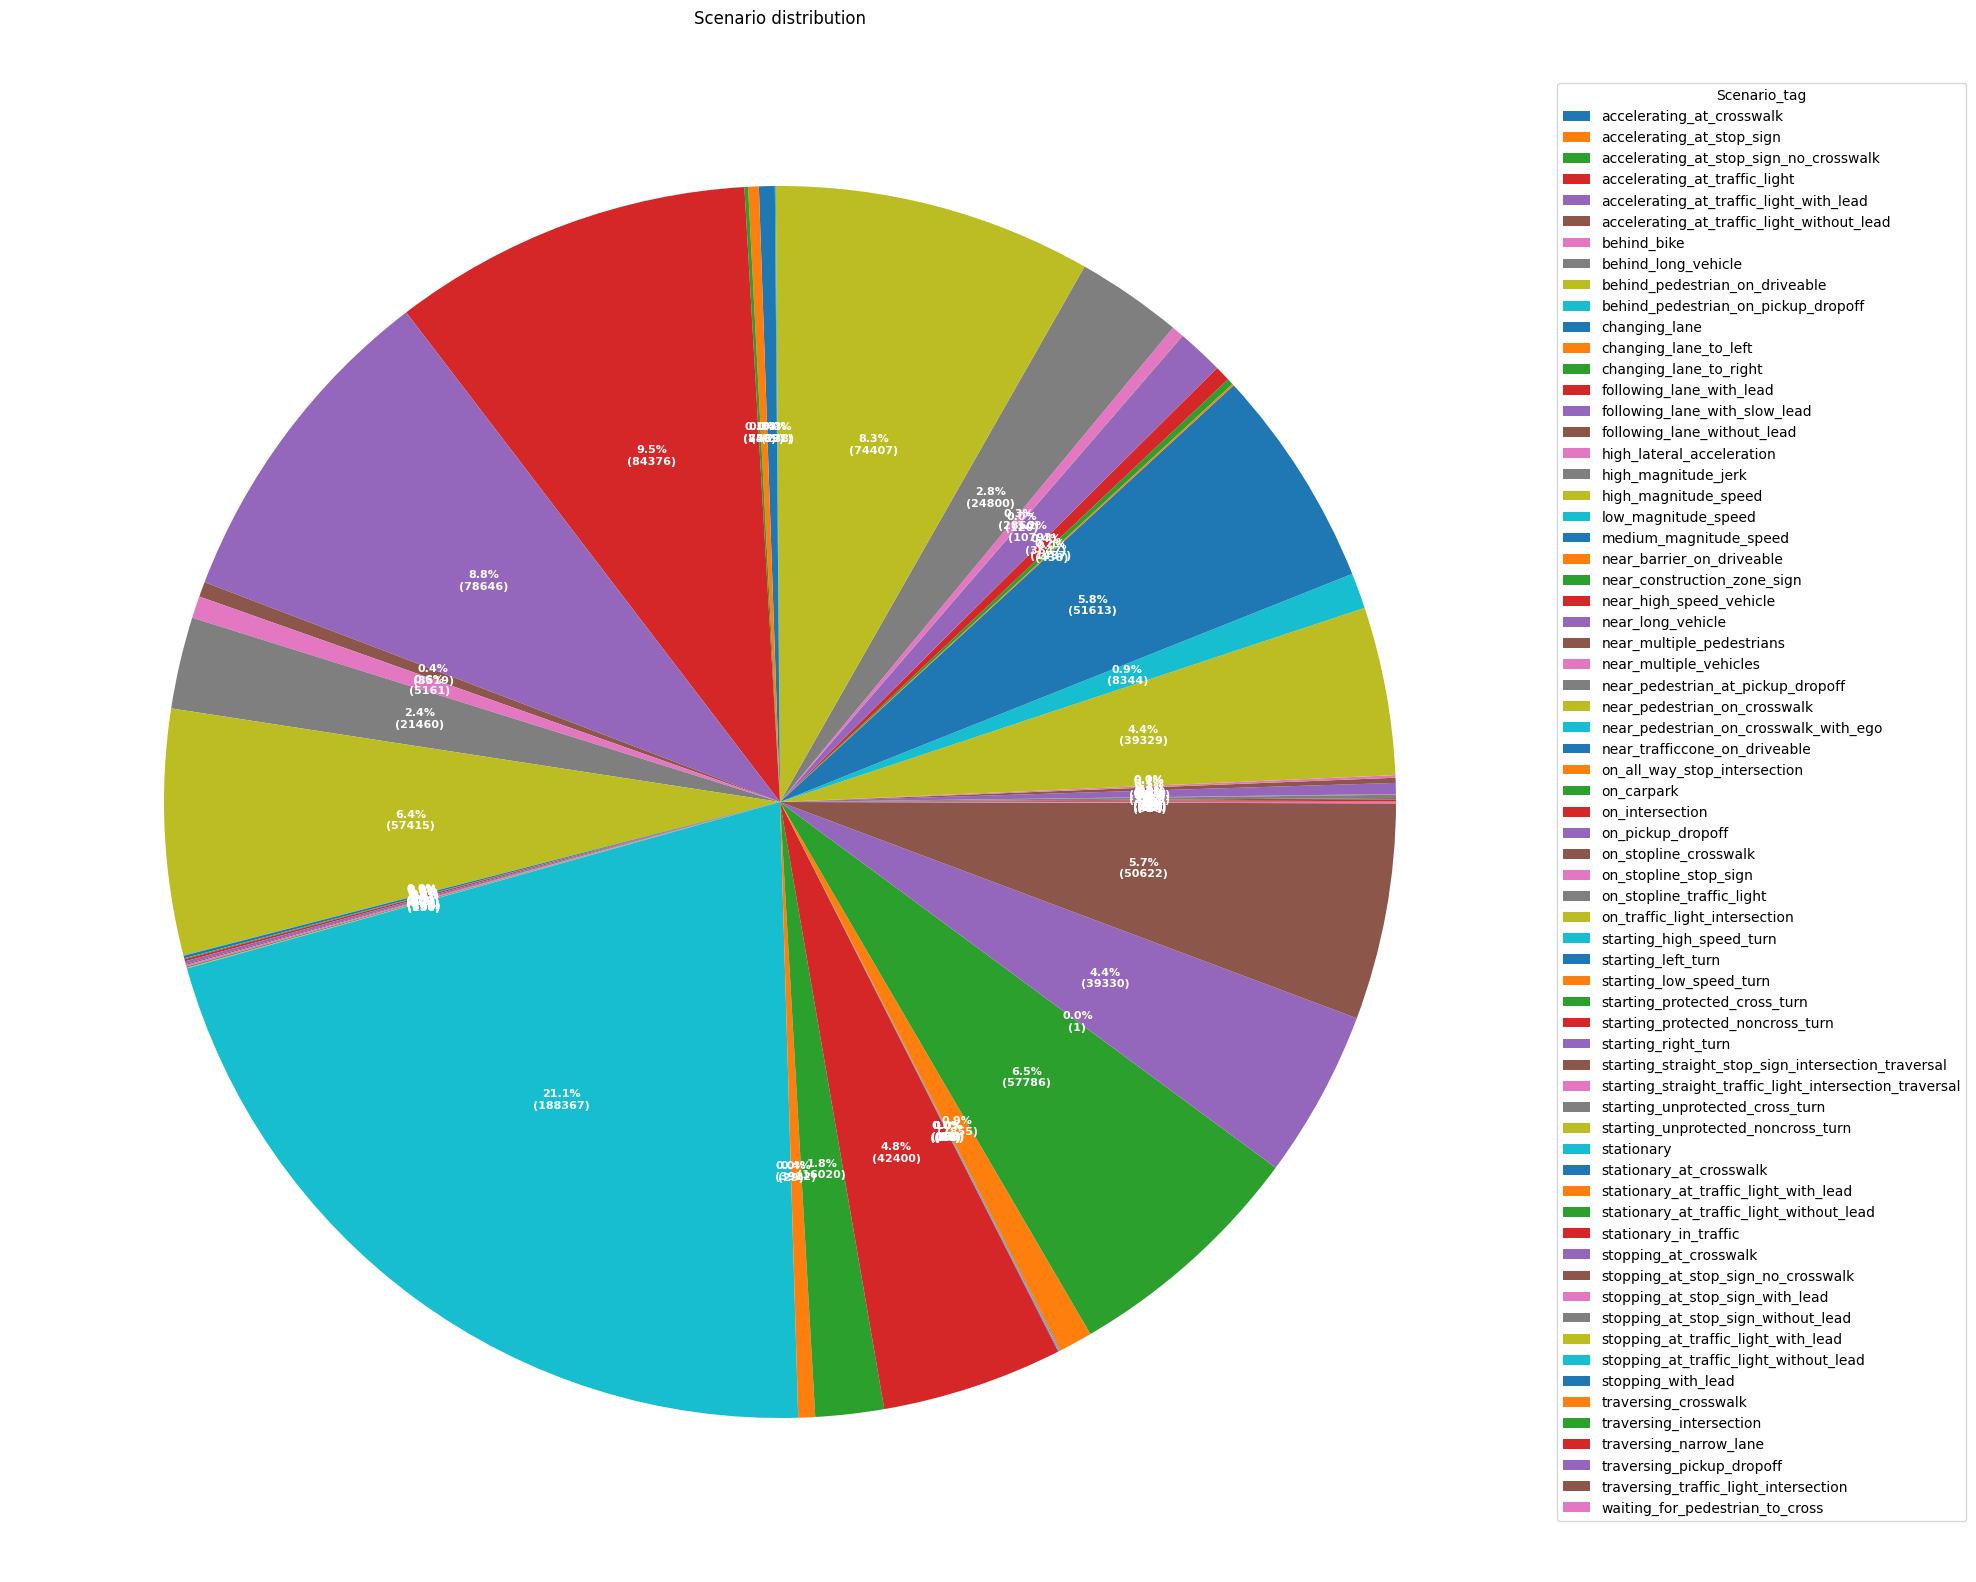

In [84]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20, 20), subplot_kw=dict(aspect="equal"))

data = sizes
ingredients = labels


def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return f"{pct:.1f}%\n({absolute:d})"


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, ingredients,
          title="Scenario_tag",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("Scenario distribution")

plt.show()